# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']
print(X.keys())

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Write and Run Your Own Code

In [3]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Task 1: Implement Linear Regression
# Hint: You can use np.linalg.lstsq() or implement the normal equation: w = (X^T X)^{-1} X^T y

def linear_regression(X, y):
    """
    Implement linear regression using least-squares.
    
    Parameters:
    -----------
    X : numpy array of shape (n_samples, n_features)
    y : numpy array of shape (n_samples,)
    
    Returns:
    --------
    coefficients : numpy array
    """

    #adds column of 1s to X for the intercept term
    ones_column= np.ones(len(X))
    # I used the following website for reference on how to do array manipulation: https://numpy.org/doc/stable/reference/routines.array-manipulation.html
    X_with_bias= np.column_stack([ones_column, X])

    #use numpy's built in least squares function https://numpy.org/devdocs/reference/generated/numpy.linalg.lstsq.html
    result= np.linalg.lstsq(X_with_bias, y, rcond=None)
    coefficients= result[0]

    return coefficients


def compute_error(X, y, coefficients):
    """
    Compute the prediction error.
    
    Returns:
    --------
    error : float (e.g., RMSE or L2 norm)
    """
    #add column of 1's to multiply with intercept
    ones_column= np.ones(len(X))
    X_with_bias= np.column_stack([ones_column, X])

    #make predictions by multiplying X by coefficients
    predictions= X_with_bias @coefficients

    #calculate error with root mean squared error
    errors= y-predictions
    squared_errors= errors **2
    mean_squared_error= np.mean(squared_errors)
    rmse= np.sqrt(mean_squared_error)

    return rmse


## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [6]:
# Create feature matrix with 'alcohol' and 'density'
X_2features = np.vstack((X['alcohol'], X['density'])).T

# TODO: Train model and compute error
model_2 = linear_regression(X_2features, y)
error_2 = compute_error(X_2features, y, model_2)
print(f"Error with 2 features: {error_2:.4f}")


Error with 2 features: 0.1686


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [28]:
# TODO: Try each remaining feature and find the best 3rd feature using alcohol and density

#store error values in an array
results_3rd= {}

for key in X.keys():
     if key not in ['alcohol', 'density']:
         X_new = np.vstack((X['alcohol'], X['density'], X[key])).T
         # Train model and compute error
         new_model= linear_regression(X_new, y)
         error_new= compute_error(X_new, y, new_model)
         #store the error
         results_3rd[key]= error_new
         # Print results
         print(f"For {key}, Error= {error_new:.4f}")
# find the minimum error in the array. cite for notation: https://numpy.org/doc/2.2/reference/generated/numpy.min.html
best_3rd_feature= min(results_3rd, key=results_3rd.get)
#store that error
error_3= results_3rd[best_3rd_feature]
#print 3rd best feature
print(f"\nBest 3rd feature: {best_3rd_feature}")
print(f"Error: {results_3rd[best_3rd_feature]:.4f}")
print(f"This improves the model, reducing error by {error_2 - error_3:.4f}")

For fixed_acidity, Error= 0.1538
For volatile_acidity, Error= 0.1320
For residual_sugar, Error= 0.1634
For chlorides, Error= 0.1637
For free_sulfur_dioxide, Error= 0.1675
For total_sulfur_dioxide, Error= 0.1618
For pH, Error= 0.1605
For sulphates, Error= 0.1630

Best 3rd feature: volatile_acidity
Error: 0.1320
This improves the model the most, reducing error by 0.0365


## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [34]:
# TODO: Find the best 4th feature

#same process as in task 3
results_4th = {}

for key in X.keys():
    if key not in ['alcohol', 'density', best_3rd_feature]:
        X_new= np.vstack((X['alcohol'], X['density'], X[best_3rd_feature], X[key])).T
        # Train model and compute error
        new_model= linear_regression(X_new, y)
        error_new= compute_error(X_new, y, new_model)
        #store the error
        results_4th[key] = error_new
        #print results
        print(f"With feature '{key}': Error = {error_new:.4f}")

# find the minimum error in the array. cite for notation: https://numpy.org/doc/2.2/reference/generated/numpy.min.html
best_4th_feature = min(results_4th, key=results_4th.get)
error_4= results_4th[best_4th_feature]
print(f"\nBest 4th feature: {best_4th_feature}")
print(f"Error: {error_4:.4f}")
print(f"This improves the model, reducing error by {error_3 - error_4:.4f}")

# TODO: Train full model with all features
X_all = np.vstack([X[key] for key in X.keys()]).T
model_full = linear_regression(X_all, y)
error_full = compute_error(X_all, y, model_full)

#print full model
print(f"\nFull model with all {len(X.keys())} features:")
print(f"Error: {error_full:.4f}")
print(f"Improvement from 4 features: {results_4th[best_4th_feature] - error_full:.4f}")

# Calculate improvements between adding features
improvement_2_to_3 =error_2 - error_3
improvement_3_to_4 =error_3 - error_4
improvement_4_to_all = error_4 - error_full

print("Incremental Improvements:")
print(f"Improvement of adding 3rd feature is {improvement_2_to_3:.4f}")
print(f"Improvement of adding 4th feature is {improvement_3_to_4:.4f}")
print(f"Adding remaining 6 features is {improvement_4_to_all:.4f}")

if improvement_4_to_all < improvement_3_to_4:
    print("Adding 6 more features provides less benefit than adding just the 4th feature. The first few features capture the most important patterns, while later features add redundant or less useful information.")
else:
    print("Adding all remaining features provides substantial benefit. The additional features capture information that improves predictions.")

With feature 'fixed_acidity': Error = 0.1242
With feature 'residual_sugar': Error = 0.1295
With feature 'chlorides': Error = 0.1258
With feature 'free_sulfur_dioxide': Error = 0.1307
With feature 'total_sulfur_dioxide': Error = 0.1258
With feature 'pH': Error = 0.1283
With feature 'sulphates': Error = 0.1289

Best 4th feature: fixed_acidity
Error: 0.1242
This improves the model the most, reducing error by 0.0079

Full model with all 10 features:
Error: 0.1055
Improvement from 4 features: 0.0186
Incremental Improvements:
Improvement of adding 3rd feature is 0.0365
Improvement of adding 4th feature is 0.0079
Adding remaining 6 features is 0.0186
Adding all remaining features provides substantial benefit. The additional features capture information that improves predictions.


## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


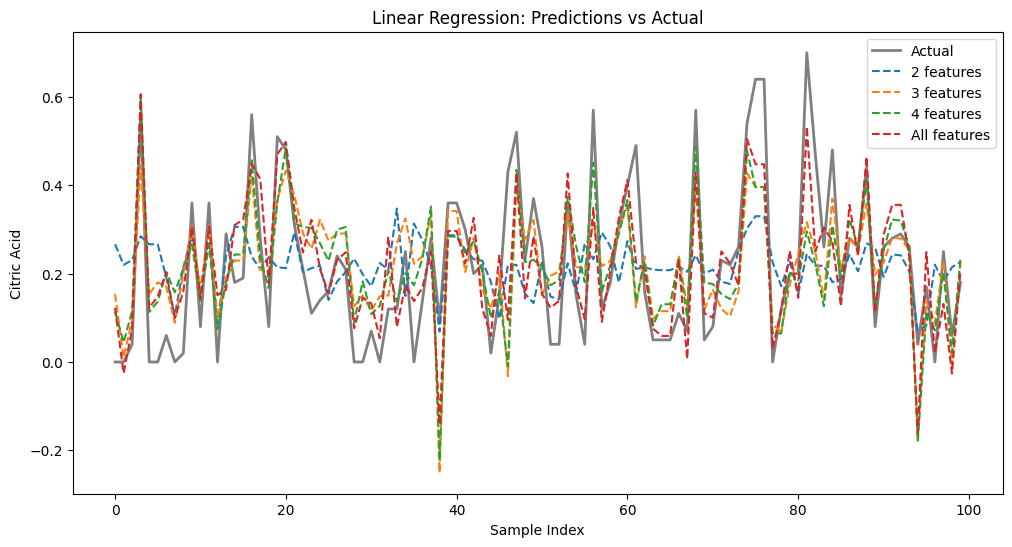

In [36]:
# TODO: Create comparison plots

#create feature matrices for 3 and 4 features
X_3features= np.vstack((X['alcohol'], X['density'], X[best_3rd_feature])).T
X_4features= np.vstack((X['alcohol'], X['density'], X[best_3rd_feature], X[best_4th_feature])).T

#now train the models for 3 and 4 features like in task2
model_3= linear_regression(X_3features, y)
model_4= linear_regression(X_4features, y)

#add column of ones for intercept when graphing
X_2features_bias= np.column_stack([np.ones(len(X_2features)), X_2features])
X_3features_bias= np.column_stack([np.ones(len(X_3features)), X_3features])
X_4features_bias= np.column_stack([np.ones(len(X_4features)), X_4features])
X_all_bias= np.column_stack([np.ones(len(X_all)), X_all])

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual', color='gray', linewidth=2)
plt.plot(X_2features_bias @ model_2, label='2 features', linestyle='--')
plt.plot(X_3features_bias @ model_3, label='3 features', linestyle='--')
#I added these
plt.plot(X_4features_bias @ model_4, label='4 features', linestyle='--')
plt.plot(X_all_bias @ model_full, label='All features', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Citric Acid')
plt.title('Linear Regression: Predictions vs Actual')
plt.show()

## Summary and Discussion

### Results Table
| Model | Features | Error |
|-------|----------|-------|
| Model 1 | alcohol, density | 0.1686 |
| Model 2 | alcohol, density, volatile acidity | 0.1320 |
| Model 3 | alcohol, density, volatile acidity, fixed acidity | 0.1242 |
| Full Model | all features | 0.1055 |

### Discussion
*Write your analysis here:*
- Which features are most important for predicting citric acid?
- Does adding more features always improve the model?
- What did you learn from this exercise?

The results show a clear improvement in prediction accuracy as more relevant features are added to the model. Using only alcohol and density in the first model produced the highest error, indicating that these two variables alone are not strong predictors of citric acid. When volatile acidity was added in model 2, the error decreased substantially, suggesting that volatile acidity has a strong relationship with citric acid levels. Adding fixed acidity in the third model further reduced the error, though the improvement was smaller compared to the addition of volatile acidity. Finally, the full model, which includes all available features, achieved the lowest error overall. This suggests that the additional measurements provide complementary information that improves the model’s predictive performance.
Among the features considered, volatile acidity appears to be the most important based on the magnitude of error reduction when it was introduced. Fixed acidity also contributes meaningfully, while alcohol and density alone are comparatively weaker predictors. This outcome is intuitive, since acidity related variables are chemically related to citric acid and therefore more directly informative.
As seen in the linear regression plot in task 5, the 2-feature model clearly underfits, staying relatively flat and failing to capture many of the peaks and valleys in the actual citric acid values. As more features are added, the models progressively track the true signal more closely, with the full model aligning best overall and achieving the lowest error, though all models still struggle to capture extreme spikes. Although the full model performed best overall, all models still struggled with extreme spikes at both high and low values. This suggests that a purely linear model may not fully capture complex relationships in the data. Overall, this part of the coding assignment reinforced the importance of careful feature selection and demonstrated how incremental feature addition helps reveal which variables contribute most to being able to predict performance.